In [1]:
df_ihh  <-  read.csv(file="raw_data.csv", header=TRUE, sep=",", row.names =1)

In [2]:
df_ihh$MA[df_ihh$MA == 0] <- NA

In [3]:
library('plm')

Loading required package: Formula


In [4]:
df_ihh = pdata.frame(df_ihh, index = c('otrasl','year'))

In [5]:
df_ihh['ma_lag'] = lag(df_ihh$MA, 1)

In [6]:
df_lag = lag(df_ihh$MA, 1)

In [7]:
df_ihh['log_ihh'] = log(df_ihh$IHH)
df_ihh['log_ma'] = log(df_ihh$MA)


 Missing rows: 14 


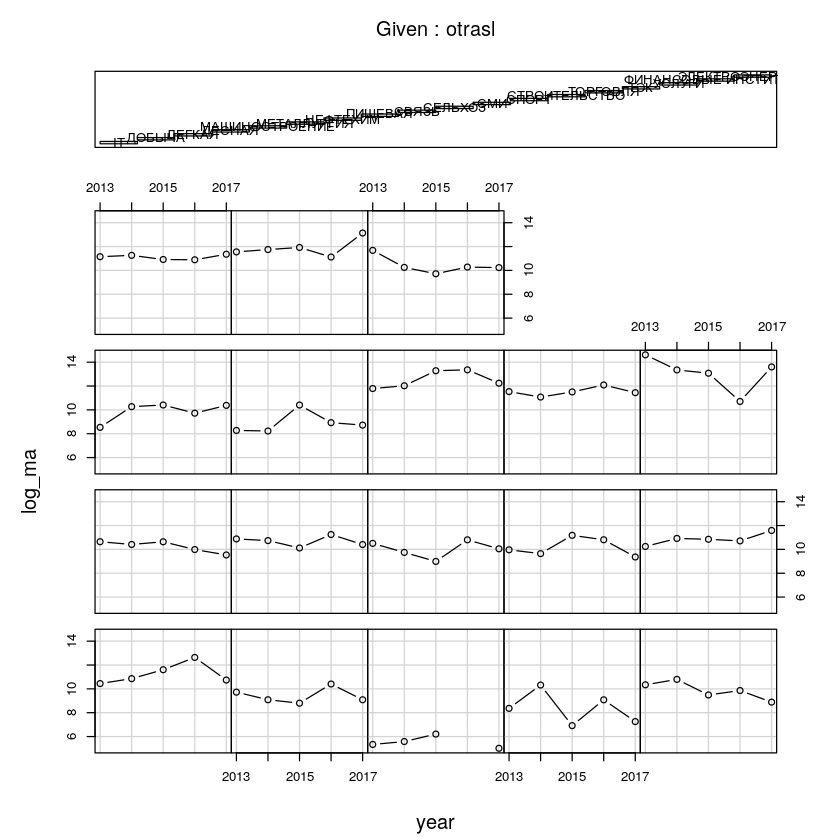

In [8]:
coplot(log_ma ~ year|otrasl, type="b", data=df_ihh)

In [10]:
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
“zero-length arrow is of indeterminate angle and so skipped”

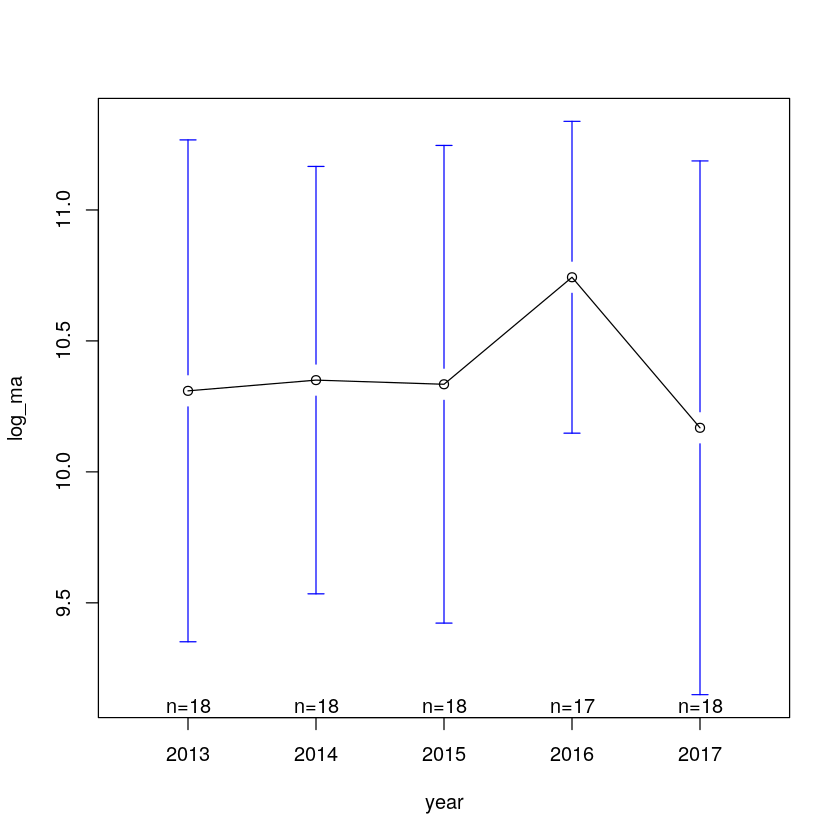

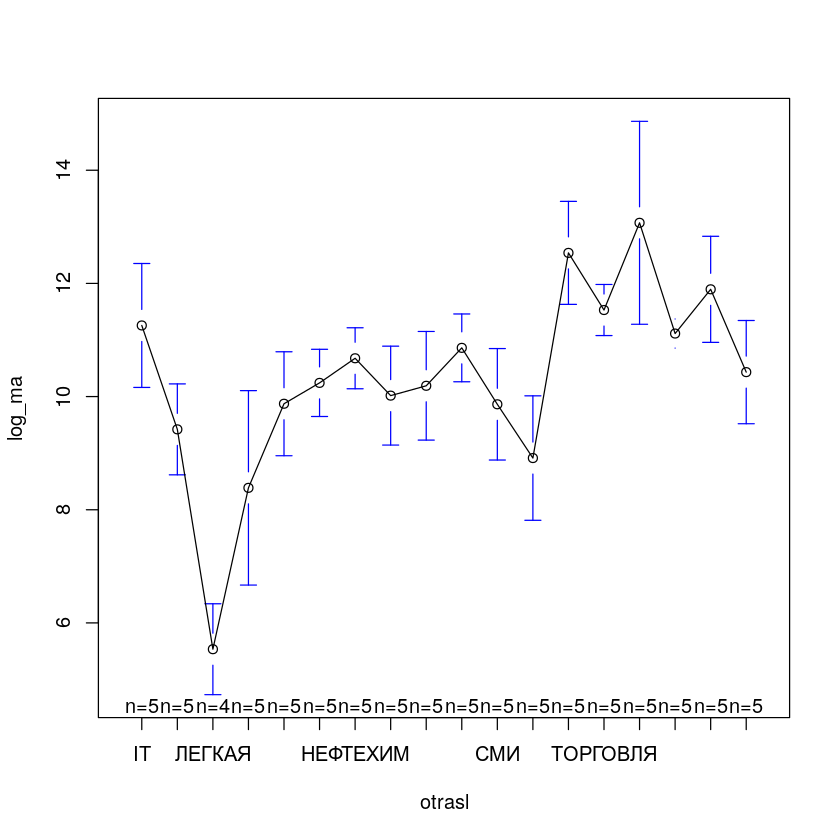

In [12]:
plotmeans(log_ma ~ year, data = df_ihh)
plotmeans(log_ma ~ otrasl, data = df_ihh)

In [13]:
ols <-lm(log_ma~log_ihh, data = df_ihh)
summary(ols)


Call:
lm(formula = log_ma ~ log_ihh, data = df_ihh)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3511 -0.7246  0.1032  0.9936  4.1916 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.14568    0.72459   14.00   <2e-16 ***
log_ihh      0.04385    0.13284    0.33    0.742    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.734 on 87 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.001251,	Adjusted R-squared:  -0.01023 
F-statistic: 0.1089 on 1 and 87 DF,  p-value: 0.7421


In [14]:
library(ggplot2)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

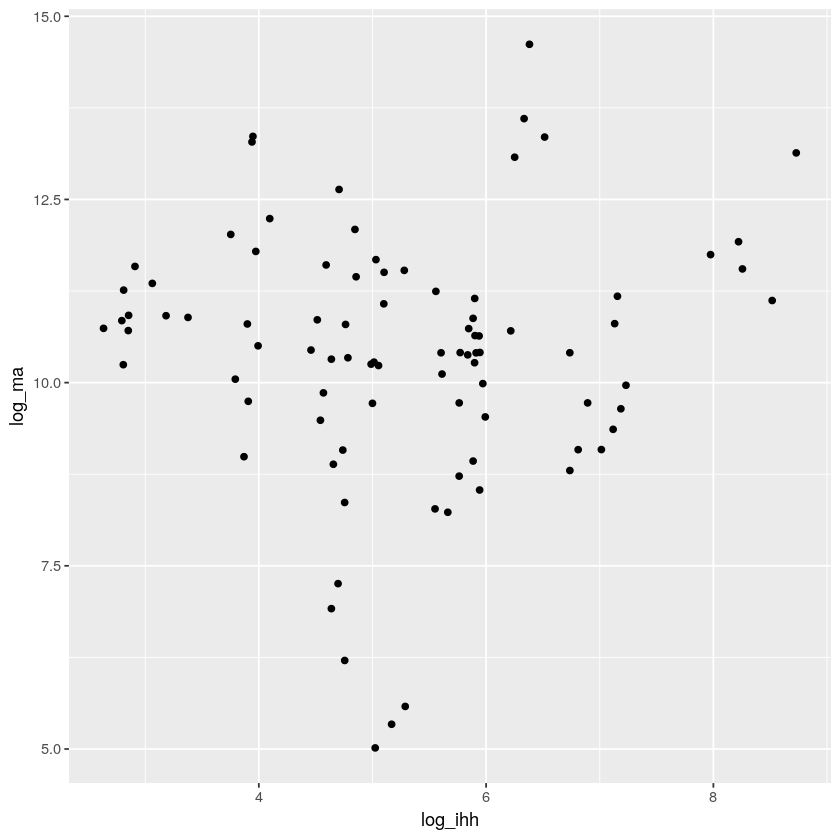

In [15]:
yhat <- ols$fitted
ggplot(df_ihh, aes(x = log_ihh, y = log_ma))+
  geom_point() 
# +
#    geom_smooth(method=lm)

In [16]:
fixed.dum <-lm(log_ma~log_ihh + factor(otrasl) - 1, data = df_ihh)
summary(fixed.dum)


Call:
lm(formula = log_ma ~ log_ihh + factor(otrasl) - 1, data = df_ihh)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33674 -0.46617 -0.04461  0.43885  1.94516 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
log_ihh                              0.2244     0.2417   0.929  0.35631    
factor(otrasl)IT                    10.3185     1.0697   9.646 1.75e-14 ***
factor(otrasl)ДОБЫЧА                 7.8859     1.6895   4.668 1.42e-05 ***
factor(otrasl)ЛЕГКАЯ                 4.4001     1.2841   3.426  0.00103 ** 
factor(otrasl)ЛЕСНАЯ                 7.3338     1.1874   6.176 3.82e-08 ***
factor(otrasl)МАШИНОСТРОЕНИЕ         8.8268     1.1803   7.479 1.66e-10 ***
factor(otrasl)МЕТАЛЛУРГИЯ            8.9066     1.4802   6.017 7.31e-08 ***
factor(otrasl)НЕФТЕХИМ               9.3974     1.4219   6.609 6.39e-09 ***
factor(otrasl)ПИЩЕВАЯ                9.1433     1.0041   9.106 1.69e-13 ***
factor(otrasl)СВЯЗЬ                  8.5828    

In [17]:
library(car)  

Loading required package: carData


In [20]:
# yhat <- fixed.dum$fitted
# scatterplot(yhat ~ df_ihh$log_ihh | df_ihh$otrasl,  xlab ="x1", ylab ="yhat", boxplots = FALSE,smooth = FALSE)
# abline(lm(df_ihh$log_ma~df_ihh$log_ihh),lwd=3, col="red")

In [21]:
fixed <- plm(log_ma~log_ihh, data = df_ihh, model="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = log_ma ~ log_ihh, data = df_ihh, model = "within")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.336741 -0.466168 -0.044607  0.438847  1.945156 

Coefficients:
        Estimate Std. Error t-value Pr(>|t|)
log_ihh  0.22441    0.24168  0.9286   0.3563

Total Sum of Squares:    43.652
Residual Sum of Squares: 43.121
R-Squared:      0.012168
Adj. R-Squared: -0.24185
F-statistic: 0.862217 on 1 and 70 DF, p-value: 0.35631

In [22]:
fixef(fixed)

IT               ДОБЫЧА               ЛЕГКАЯ 
           10.318525             7.885944             4.400071 
              ЛЕСНАЯ       МАШИНОСТРОЕНИЕ          МЕТАЛЛУРГИЯ 
            7.333767             8.826819             8.906581 
            НЕФТЕХИМ              ПИЩЕВАЯ                СВЯЗЬ 
            9.397391             9.143267             8.582779 
             СЕЛЬХОЗ                  СМИ                СПОРТ 
           10.222865             8.552205             7.621993 
       СТРОИТЕЛЬСТВО             ТОРГОВЛЯ                  ТЭК 
           11.654662            10.399194            11.648127 
              УСЛУГИ ФИНАНСОВЫЕ ИНСТИТУТЫ    ЭЛЕКТРОЭНЕРГЕТИКА 
           10.290886            10.023995             9.306269

In [23]:
pFtest(fixed, ols)


	F test for individual effects

data:  log_ma ~ log_ihh
F = 20.875, df1 = 17, df2 = 70, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 0.05 выбираем fe model 

In [24]:
random <- plm(log_ma~log_ihh, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log_ma ~ log_ihh, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Effects:
                 var std.dev share
idiosyncratic 0.6160  0.7849 0.189
individual    2.6362  1.6236 0.811
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7651  0.7887  0.7887  0.7876  0.7887  0.7887 

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.85468 -0.44523  0.03640  0.00562  0.44854  2.08637 

Coefficients:
            Estimate Std. Error z-value Pr(>|z|)    
(Intercept)  9.53947    1.06313  8.9730   <2e-16 ***
log_ihh      0.14917    0.18730  0.7964   0.4258    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    52.398
Residual Sum of Squares: 53.988
R-Squared:      0.0075713
Adj. R-Squared: -0.0038359
Chisq: -2.56242 on 1 DF, p-value: 1

In [25]:
phtest(fixed, random)


	Hausman Test

data:  log_ma ~ log_ihh
chisq = 0.24269, df = 1, p-value = 0.6223
alternative hypothesis: one model is inconsistent


p-value > 0.5 используем  RE модель

In [26]:
fixed.time <- plm(log_ma~log_ihh + factor(year), data=df_ihh, model="within")
summary(fixed.time)



Oneway (individual) effect Within Model

Call:
plm(formula = log_ma ~ log_ihh + factor(year), data = df_ihh, 
    model = "within")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.477099 -0.403545 -0.059186  0.466574  1.916600 

Coefficients:
                  Estimate Std. Error t-value Pr(>|t|)
log_ihh           0.221452   0.257475  0.8601   0.3929
factor(year)2014  0.084407   0.271898  0.3104   0.7572
factor(year)2015  0.076485   0.273759  0.2794   0.7808
factor(year)2016  0.196009   0.276383  0.7092   0.4807
factor(year)2017 -0.076827   0.277414 -0.2769   0.7827

Total Sum of Squares:    43.652
Residual Sum of Squares: 42.396
R-Squared:      0.028761
Adj. R-Squared: -0.29498
F-statistic: 0.390893 on 5 and 66 DF, p-value: 0.85337

In [27]:
pFtest(fixed.time, fixed)


	F test for individual effects

data:  log_ma ~ log_ihh + factor(year)
F = 0.28191, df1 = 4, df2 = 66, p-value = 0.8887
alternative hypothesis: significant effects


In [28]:
plmtest(fixed, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan) for unbalanced
	panels

data:  log_ma ~ log_ihh
chisq = 1.6555, df = 1, p-value = 0.1982
alternative hypothesis: significant effects


нет фиксированных временных эффектов

In [29]:
pool <- plm(log_ma~log_ihh, data = df_ihh, model="pooling")
summary(pool)

Pooling Model

Call:
plm(formula = log_ma ~ log_ihh, data = df_ihh, model = "pooling")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-5.35110 -0.72460  0.10320  0.99363  4.19162 

Coefficients:
             Estimate Std. Error t-value Pr(>|t|)    
(Intercept) 10.145681   0.724591 14.0019   <2e-16 ***
log_ihh      0.043846   0.132840  0.3301   0.7421    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    262.05
Residual Sum of Squares: 261.73
R-Squared:      0.0012507
Adj. R-Squared: -0.010229
F-statistic: 0.108943 on 1 and 87 DF, p-value: 0.74214

In [30]:
plmtest(pool, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  log_ma ~ log_ihh
chisq = 89.02, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 2.2e-16  используем re модель

In [31]:
pcdtest(fixed, test = c("lm"))


	Breusch-Pagan LM test for cross-sectional dependence in panels

data:  log_ma ~ log_ihh
chisq = 188.49, df = 153, p-value = 0.02696
alternative hypothesis: cross-sectional dependence


In [32]:
pcdtest(fixed, test = c("cd"))


	Pesaran CD test for cross-sectional dependence in panels

data:  log_ma ~ log_ihh
z = -0.72044, p-value = 0.4713
alternative hypothesis: cross-sectional dependence


p-value > 0.05 нет кросс-секциональной зависимости

In [33]:
pbgtest(fixed)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  log_ma ~ log_ihh
chisq = 21.793, df = 4, p-value = 0.0002204
alternative hypothesis: serial correlation in idiosyncratic errors


Есть серийная корреляция, однако на коротких временных рядах - это не является проблемой

In [37]:
library(tseries)  

In [39]:
library(lmtest)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [40]:
bptest(log_ma~log_ihh, data = df_ihh, studentize=F)


	Breusch-Pagan test

data:  log_ma ~ log_ihh
BP = 0.079951, df = 1, p-value = 0.7774


НЕТ гетероскдастичности

In [41]:
coeftest(random) 


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.53947    1.06313  8.9730  5.1e-14 ***
log_ihh      0.14917    0.18730  0.7964    0.428    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [42]:
coeftest(random, vcovHC) 


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.53947    0.79663 11.9748   <2e-16 ***
log_ihh      0.14917    0.13503  1.1047   0.2723    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [194]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 84897.969  46786.726  1.8146  0.07300 .
IHH            47.921     22.241  2.1546  0.03392 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


HC3 – Recommended for small samples. HC3 gives less weight to influential observations.

In [44]:
random <- plm(log_ma~log_ihh+log(ma_lag), data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log_ma ~ log_ihh + log(ma_lag), data = df_ihh, 
    model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                 var std.dev share
idiosyncratic 0.5837  0.7640     1
individual    0.0000  0.0000     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-3.415411 -0.627542 -0.052921  0.642419  2.945414 

Coefficients:
            Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) 2.644618   0.997104  2.6523  0.007995 ** 
log_ihh     0.025212   0.090279  0.2793  0.780042    
log(ma_lag) 0.733486   0.081943  8.9512 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    169.49
Residual Sum of Squares: 77.18
R-Squared:      0.54464
Adj. R-Squared: 0.53104
Chisq: 80.1352 on 2 DF, p-value: < 2.22e

In [45]:
coeftest(random, vcovHC) 


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 2.644618   0.810665  3.2623  0.001741 ** 
log_ihh     0.025212   0.081964  0.3076  0.759345    
log(ma_lag) 0.733486   0.071159 10.3078 1.851e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [46]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 2.644618   0.930431  2.8424  0.005929 ** 
log_ihh     0.025212   0.088383  0.2853  0.776330    
log(ma_lag) 0.733486   0.081240  9.0287 3.401e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [49]:
random <- plm(log_ma~log_ihh+log(ma_lag)+real_prices+real_gdp_change, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log_ma ~ log_ihh + log(ma_lag) + real_prices + 
    real_gdp_change, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                 var std.dev share
idiosyncratic 0.3763  0.6135     1
individual    0.0000  0.0000     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-3.05846 -0.52772  0.19510  0.64034  1.49621 

Coefficients:
                   Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)      4.9432e+00  9.1929e-01  5.3772 7.565e-08 ***
log_ihh         -2.8651e-02  7.5305e-02 -0.3805    0.7036    
log(ma_lag)      5.0068e-01  7.9253e-02  6.3174 2.659e-10 ***
real_prices      5.0486e-06  8.8136e-07  5.7282 1.015e-08 ***
real_gdp_change  3.8343e-06  8.8077e-05  0.0435    0.9653    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

In [50]:
coeftest(random, vcovHC) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      4.9432e+00  1.5227e+00  3.2464  0.001849 ** 
log_ihh         -2.8651e-02  7.3641e-02 -0.3891  0.698506    
log(ma_lag)      5.0068e-01  1.3411e-01  3.7333  0.000400 ***
real_prices      5.0486e-06  7.9789e-07  6.3274 2.627e-08 ***
real_gdp_change  3.8343e-06  8.2515e-05  0.0465  0.963080    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [51]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      4.9432e+00  1.8701e+00  2.6433  0.010279 *  
log_ihh         -2.8651e-02  8.3084e-02 -0.3448  0.731329    
log(ma_lag)      5.0068e-01  1.6492e-01  3.0359  0.003448 ** 
real_prices      5.0486e-06  9.5106e-07  5.3084 1.434e-06 ***
real_gdp_change  3.8343e-06  8.9076e-05  0.0430  0.965797    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [52]:
colnames(df_ihh)

[1] "year"            "otrasl"          "TR"              "TR10"           
 [5] "TR50"            "TR100"           "TR10."           "CR.10."         
 [9] "CR.50."          "CR.100."         "CR10."           "IHH"            
[13] "MA"              "real_prices"     "real_gdp_change" "market_type"    
[17] "type_1"          "type_2"          "type_3"          "type_4"         
[21] "ma_lag"          "log_ihh"         "log_ma"

In [53]:
random <- plm(log_ma~log_ihh+log(ma_lag)+real_prices+real_gdp_change+market_type, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log_ma ~ log_ihh + log(ma_lag) + real_prices + 
    real_gdp_change + market_type, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                 var std.dev share
idiosyncratic 0.3839  0.6196     1
individual    0.0000  0.0000     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-3.05298 -0.50792  0.15966  0.63491  1.49712 

Coefficients:
                   Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)      4.6939e+00  1.2798e+00  3.6677 0.0002448 ***
log_ihh          3.3520e-02  2.3307e-01  0.1438 0.8856441    
log(ma_lag)      5.0356e-01  8.0470e-02  6.2577 3.908e-10 ***
real_prices      5.0294e-06  8.9028e-07  5.6492 1.612e-08 ***
real_gdp_change  6.7583e-06  8.9311e-05  0.0757 0.9396798    
market_type     -6.8524e-02

In [54]:
coeftest(random, vcovHC) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      4.6939e+00  1.5919e+00  2.9486 0.0044527 ** 
log_ihh          3.3520e-02  2.2596e-01  0.1483 0.8825375    
log(ma_lag)      5.0356e-01  1.3235e-01  3.8047 0.0003199 ***
real_prices      5.0294e-06  7.8314e-07  6.4220 1.899e-08 ***
real_gdp_change  6.7583e-06  8.1464e-05  0.0830 0.9341412    
market_type     -6.8524e-02  2.0987e-01 -0.3265 0.7451086    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [55]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      4.6939e+00  1.9262e+00  2.4369  0.017603 *  
log_ihh          3.3520e-02  2.5664e-01  0.1306  0.896493    
log(ma_lag)      5.0356e-01  1.6457e-01  3.0599  0.003233 ** 
real_prices      5.0294e-06  9.3722e-07  5.3663 1.187e-06 ***
real_gdp_change  6.7583e-06  8.9393e-05  0.0756  0.939971    
market_type     -6.8524e-02  2.3894e-01 -0.2868  0.775205    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [56]:
df_ihh$real_prices[df_ihh$real_prices == 0] <- NA

In [58]:
random <- plm(log_ma~log_ihh+log(ma_lag)+log(real_prices)+real_gdp_change+market_type, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log_ma ~ log_ihh + log(ma_lag) + log(real_prices) + 
    real_gdp_change + market_type, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                 var std.dev share
idiosyncratic 0.1813  0.4258     1
individual    0.0000  0.0000     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-2.4394034 -0.0795478  0.0070387  0.0927140  1.7257660 

Coefficients:
                    Estimate  Std. Error z-value Pr(>|z|)    
(Intercept)       2.6360e-01  5.3100e-01  0.4964   0.6196    
log_ihh           2.7804e-03  1.0237e-01  0.0272   0.9783    
log(ma_lag)       6.1474e-02  4.4565e-02  1.3794   0.1678    
log(real_prices)  9.2491e-01  4.4586e-02 20.7446   <2e-16 ***
real_gdp_change  -5.2438e-05  3.9417e-05 -1.3303   0.1834    
ma

In [59]:
coeftest(random, vcovHC) 


t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)    
(Intercept)       2.6360e-01  1.8467e-01  1.4274   0.1583    
log_ihh           2.7804e-03  2.7086e-02  0.1027   0.9186    
log(ma_lag)       6.1474e-02  5.5448e-02  1.1087   0.2717    
log(real_prices)  9.2491e-01  6.8008e-02 13.6001   <2e-16 ***
real_gdp_change  -5.2438e-05  6.2055e-05 -0.8450   0.4012    
market_type      -3.4851e-03  2.4718e-02 -0.1410   0.8883    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [60]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                    Estimate  Std. Error t value Pr(>|t|)    
(Intercept)       2.6360e-01  2.1631e-01  1.2186   0.2275    
log_ihh           2.7804e-03  3.2461e-02  0.0857   0.9320    
log(ma_lag)       6.1474e-02  6.2642e-02  0.9814   0.3301    
log(real_prices)  9.2491e-01  7.6315e-02 12.1196   <2e-16 ***
real_gdp_change  -5.2438e-05  6.8216e-05 -0.7687   0.4449    
market_type      -3.4851e-03  2.9257e-02 -0.1191   0.9056    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [61]:
colnames(df_ihh)

[1] "year"            "otrasl"          "TR"              "TR10"           
 [5] "TR50"            "TR100"           "TR10."           "CR.10."         
 [9] "CR.50."          "CR.100."         "CR10."           "IHH"            
[13] "MA"              "real_prices"     "real_gdp_change" "market_type"    
[17] "type_1"          "type_2"          "type_3"          "type_4"         
[21] "ma_lag"          "log_ihh"         "log_ma"

In [64]:
random <- plm(log_ma~log_ihh+log(ma_lag)+real_prices+real_gdp_change+type_1+type_2+type_3+type_4, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = log_ma ~ log_ihh + log(ma_lag) + real_prices + 
    real_gdp_change + type_1 + type_2 + type_3 + type_4, data = df_ihh, 
    model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                 var std.dev share
idiosyncratic 0.3933  0.6271     1
individual    0.0000  0.0000     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-2.72533 -0.45523  0.11769  0.50226  1.49648 

Coefficients:
                   Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)      5.2215e+00  1.2807e+00  4.0771 4.560e-05 ***
log_ihh          2.8274e-02  2.4075e-01  0.1174    0.9065    
log(ma_lag)      4.6757e-01  8.2220e-02  5.6868 1.294e-08 ***
real_prices      5.4487e-06  9.2441e-07  5.8942 3.765e-09 ***
real_gdp_change  1.7137e-05  8.8015e-05  0.1947    0.8456    


In [65]:
coeftest(random, vcovHC) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      5.2215e+00  1.4678e+00  3.5574 0.0007315 ***
log_ihh          2.8274e-02  1.7870e-01  0.1582 0.8748038    
log(ma_lag)      4.6757e-01  1.3009e-01  3.5942 0.0006514 ***
real_prices      5.4487e-06  8.1916e-07  6.6516 9.167e-09 ***
real_gdp_change  1.7137e-05  8.2667e-05  0.2073 0.8364624    
type_1          -5.0794e-01  3.7870e-01 -1.3413 0.1848076    
type_2          -1.5719e-01  4.3811e-01 -0.3588 0.7209848    
type_3          -7.7516e-01  5.2462e-01 -1.4776 0.1446708    
type_4          -1.3382e-01  7.3477e-01 -0.1821 0.8560836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [66]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      5.2215e+00  1.8123e+00  2.8812  0.005461 ** 
log_ihh          2.8274e-02  2.0779e-01  0.1361  0.892211    
log(ma_lag)      4.6757e-01  1.6325e-01  2.8641  0.005727 ** 
real_prices      5.4487e-06  1.0106e-06  5.3916 1.196e-06 ***
real_gdp_change  1.7137e-05  9.5113e-05  0.1802  0.857609    
type_1          -5.0794e-01  4.3315e-01 -1.1727  0.245495    
type_2          -1.5719e-01  5.1406e-01 -0.3058  0.760806    
type_3          -7.7516e-01  6.2055e-01 -1.2491  0.216385    
type_4          -1.3382e-01  8.5713e-01 -0.1561  0.876445    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Кратко: 

a = '4'
raw.loc[raw[raw.IHH>=1000].index, 'market_type'] =   a 

a = '3'
raw.loc[raw[(raw.IHH<1000) &  (raw.IHH>=400)].index, 'market_type'] =   a 

a = '2'
raw.loc[raw[(raw.IHH<400) &  (raw.IHH>=200)].index, 'market_type'] =   a 

a = '1'
raw.loc[raw[(raw.IHH<200) &  (raw.IHH>=100)].index, 'market_type'] =   a 

a = '0'
raw.loc[raw[(raw.IHH<100)].index, 'market_type'] =   a 

- Для анализа была выбрана RE модель
- Перемнна market_type - пять значений - и соответсвенно 4 дамми для модели
    - IHH>=1000
    - (IHH<1000) &  (IHH>=400)
    - (IHH<400) &  (IHH>=200)
    - (IHH<200) &  (IHH>=100)
    - IHH<100
- Из-за наличия гетероскедастичности необходимо использовать устойчивые к гетероскедастичности оценки ковариационной матрицы
- Если мы не применяем устойчивые оценки, для некоторых из моделей коэффициент при MA значимый, инчаче значимым остается только Intercept  и market_type (или дамми для типа рынка)
- IHH ни от цены сделки, ни от логарифма цены, ни от изменения реального ВВП 

В качестве альтернативы можно попрбоватать проверить завсимость логарифма IHH от логарифа MA (расчеты в следующем файле):